In [103]:
!rm -rf machine-learning-journey
# Define paths
REPO_PATH = "/content/machine-learning-journey"
NOTEBOOKS_PATH = f"{REPO_PATH}/notebooks"

Implementing Gradient Descent Algorithm in this Notebook

first, defining a fwb(x) utility function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')
# from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

def f_w_b(x, w,b):
  return w*x + b

Defining cost function J (called cost here)

In [ ]:
def cost(train_x, train_y ,w,b):
  size = train_x.shape[0]

  cost = 0
  for i in range(size) :
    fi = f_w_b(train_x[i],w,b)
    cost = cost +  ((train_y[i] - fi) ** 2)
  return cost / (2 * size)


cost(np.array([1,1]), [1,1],1,1)

np.float64(0.5)

Defining Gradient Calculation

In [ ]:
def calculate_gradient(train_x, train_y, w,b):
  size = train_x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(size):
    fwb = f_w_b(train_x[i] , w,b)
    dj_dw = dj_dw + (fwb - train_y[i])*train_x[i]
    dj_db = dj_db + (fwb-train_y[i])

  dj_dw = dj_dw / size
  dj_db = dj_db / size
  return dj_dw, dj_db





Calculating Gradient for with a small test data

In [ ]:
train_x = np.array([1.0, 2.0])
train_y = np.array([300.0, 500.0])
w = 0
b = 0

gd = calculate_gradient(train_x, train_y,w,b)

print(gd)

(np.float64(-650.0), np.float64(-400.0))


Define Gradient Descent with an alpha with N iterations

In [ ]:
def gradient_descent(train_x, train_y, w,b, alpha, iterations):
  cost_history = []
  w_history = []
  b_history = []
  for i in range(iterations):
    w_history.append(w)
    b_history.append(b)
    current_cost = cost(train_x, train_y, w,b)
    cost_history.append(current_cost)
    dw,db = calculate_gradient(train_x, train_y, w,b)
    w = w - alpha * dw
    b = b - alpha * db
  return w,b,cost_history,w_history,b_history



In [ ]:



train_x = np.array([1.0, 2.0])
train_y = np.array([300.0, 500.0])
w = 0
b = 0
alpha = 0.1
iterations = 10

w ,b,cost_history,w_hist,b_hist = gradient_descent(train_x, train_y, w,b,alpha, iterations)

print(w ,b,cost_history[-1],w_hist[-1],b_hist[-1])



187.3365192652637 114.11368899906252 57.46086242104911 185.77765622773438 113.31148603691408


Plotting Cost History Graph

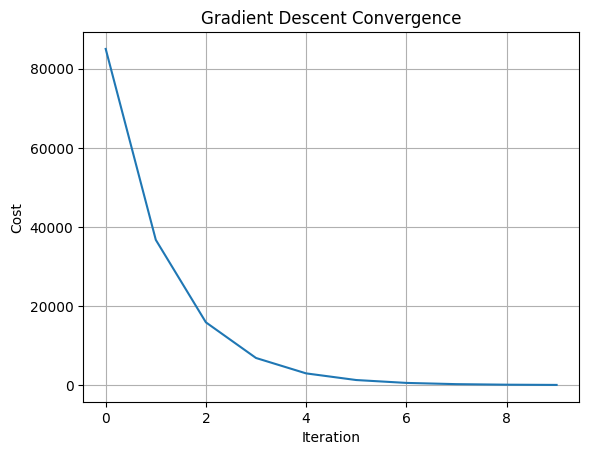

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


Plotting Weight Graph

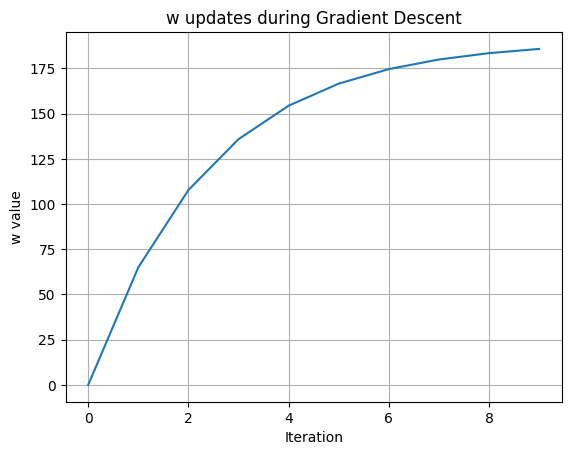

In [ ]:
plt.plot(w_hist)
plt.xlabel("Iteration")
plt.ylabel("w value")
plt.title("w updates during Gradient Descent")
plt.grid(True)
plt.show()


Plotting Bias Graph

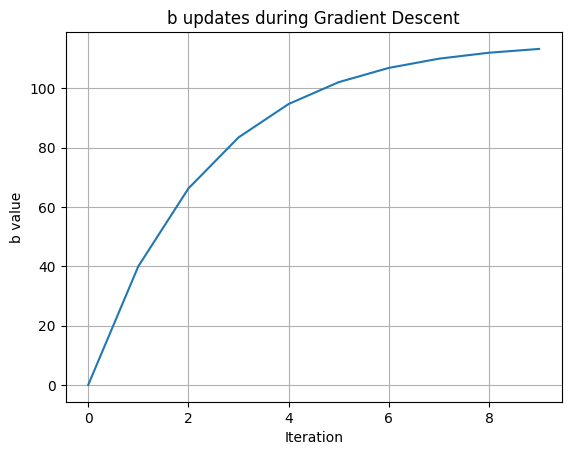

In [ ]:
plt.plot(b_hist)
plt.xlabel("Iteration")
plt.ylabel("b value")
plt.title("b updates during Gradient Descent")
plt.grid(True)
plt.show()

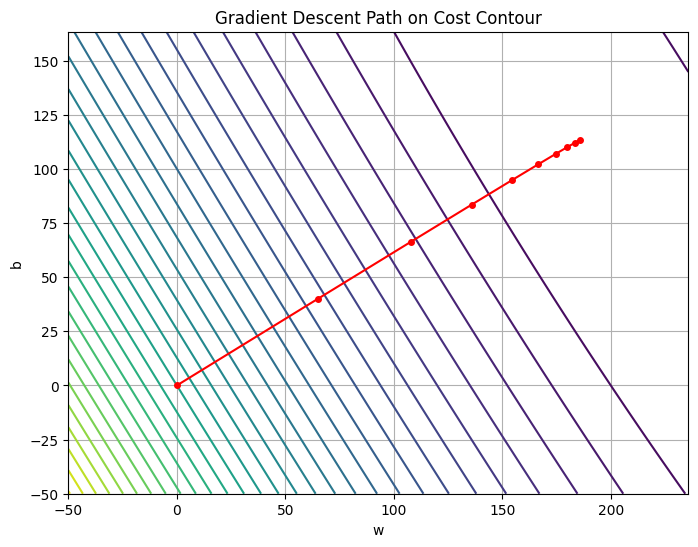

In [ ]:
# Grid for contour
w_range = np.linspace(min(w_hist)-50, max(w_hist)+50, 200)
b_range = np.linspace(min(b_hist)-50, max(b_hist)+50, 200)
W, B = np.meshgrid(w_range, b_range)

# Compute cost for every (w, b)
Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = cost(train_x, train_y, W[i,j], B[i,j])

# Plot contour
plt.figure(figsize=(8,6))
plt.contour(W, B, Z, levels=30, cmap='viridis')
plt.plot(w_hist, b_hist, 'ro-', markersize=4)  # GD path
plt.xlabel("w")
plt.ylabel("b")
plt.title("Gradient Descent Path on Cost Contour")
plt.grid(True)
plt.show()

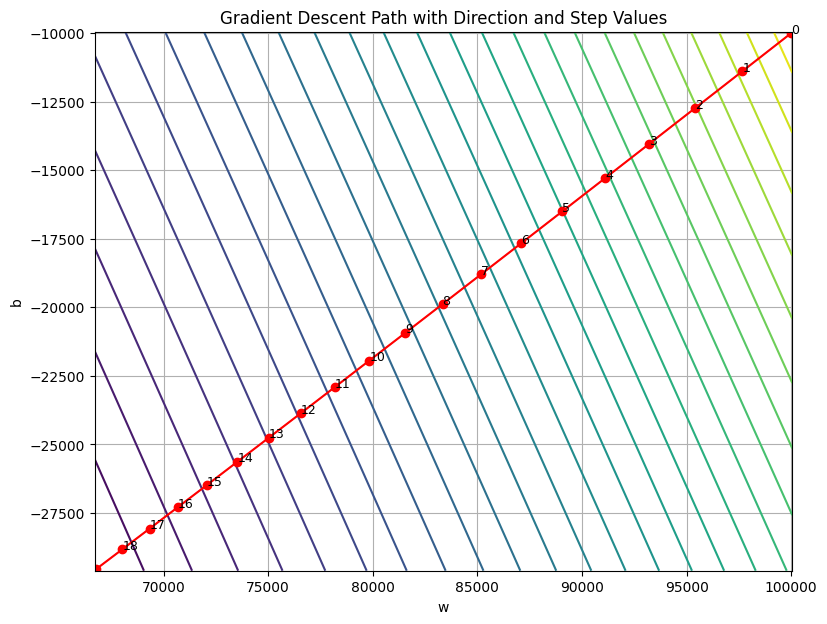

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Run GD
w_final, b_final, cost_history, w_history, b_history = gradient_descent(
    train_x, train_y, w=100000, b=-10000, alpha=0.01, iterations=20
)

# Plot cost contour
w_range = np.linspace(min(w_history)-50, max(w_history)+50, 200)
b_range = np.linspace(min(b_history)-50, max(b_history)+50, 200)
W, B = np.meshgrid(w_range, b_range)

Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = cost(train_x, train_y, W[i,j], B[i,j])

plt.figure(figsize=(9,7))
plt.contour(W, B, Z, levels=30, cmap='viridis')

# Convert histories to numpy arrays for easy plotting
wh = np.array(w_history)
bh = np.array(b_history)

# Plot path
plt.plot(wh, bh, 'ro-', label='GD Path')
plt.xlabel("w")
plt.ylabel("b")
plt.title("Gradient Descent Path with Direction and Step Values")
plt.grid(True)

# ➤ Add arrows and labels
for i in range(len(wh)-1):
    # Draw arrow showing direction from step i -> i+1
    plt.arrow(
        wh[i], bh[i],
        wh[i+1] - wh[i],
        bh[i+1] - bh[i],
        shape='full', lw=1, length_includes_head=True, head_width=1.5, color='pink'
    )

    # Add step number
    plt.text(wh[i], bh[i], f"{i}", color='black', fontsize=9)

    # Add (w,b) coordinate (optional)
    # plt.text(wh[i], bh[i]-5, f"({wh[i]:.2f}, {bh[i]:.2f})", color='blue', fontsize=8)

# Label final point
# plt.text(wh[-1], bh[-1], f"Final ({wh[-1]:.2f}, {bh[-1]:.2f})", color='green', fontsize=10)

plt.show()


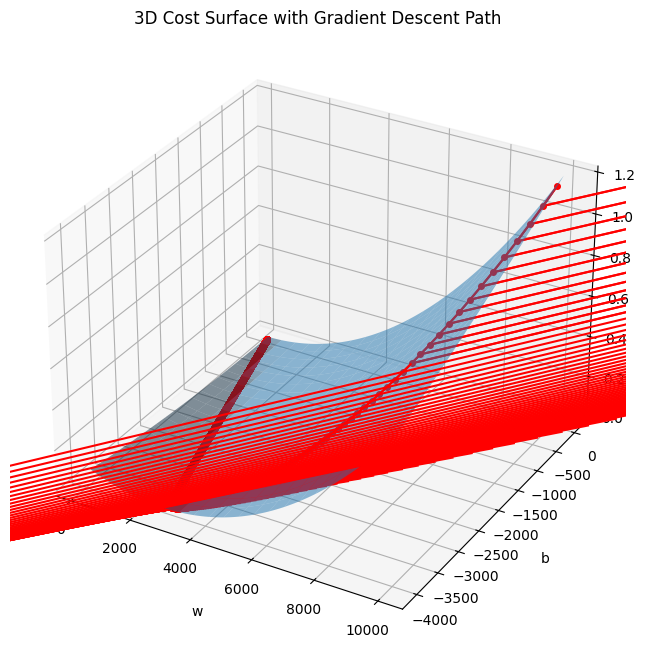

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D   # required for 3D plots

# # Run your gradient descent
# w_final, b_final, cost_history, w_history, b_history = gradient_descent(
#     train_x, train_y, w=10000, b=-100, alpha=0.01, iterations=5000
# )

# # Prepare meshgrid for cost surface
# w_range = np.linspace(min(w_history)-50, max(w_history)+50, 200)
# b_range = np.linspace(min(b_history)-50, max(b_history)+50, 200)
# W, B = np.meshgrid(w_range, b_range)

# Z = np.zeros_like(W)
# for i in range(W.shape[0]):
#     for j in range(W.shape[1]):
#         Z[i,j] = cost(train_x, train_y, W[i,j], B[i,j])

# # Convert history to arrays
# wh = np.array(w_history)
# bh = np.array(b_history)
# ch = np.array(cost_history)

# # --- 3D Plot ---
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the cost surface
# ax.plot_surface(W, B, Z, rstride=10, cstride=10, alpha=0.5, edgecolor='none')

# # Plot the gradient descent path
# ax.plot(wh, bh, ch, 'ro-', markersize=4, label="GD Path")

# # Add arrows (show direction)
# for i in range(len(wh)-1):
#     ax.quiver(
#         wh[i], bh[i], ch[i],
#         wh[i+1]-wh[i], bh[i+1]-bh[i], ch[i+1]-ch[i],
#         color='red', arrow_length_ratio=0.2
#     )

# # Labels
# ax.set_xlabel("w", labelpad=10)
# ax.set_ylabel("b", labelpad=10)
# ax.set_zlabel("Cost J(w,b)", labelpad=10)
# ax.set_title("3D Cost Surface with Gradient Descent Path")

# plt.show()


In [105]:
!cp "/content/week-1-gradient-descent-impl.ipynb" f"{NOTEBOOKS_PATH}/week1.ipynb"

cp: cannot stat '/content/week-1-gradient-descent-impl.ipynb': No such file or directory


sample_data


MessageError: Error: credential propagation was unsuccessful